In [41]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda,Compose
import matplotlib.pyplot as plt




In [42]:
#Download training data
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform= ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [43]:
type[training_data]

type[Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()]

In [44]:
type[test_data]

type[Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()]

In [45]:
batch_size = 64

#create dataloaders
train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data , batch_size = batch_size)

for X,y in test_dataloader:
  print('Shape of X[N,C,H,W]', X.shape)
  print('Shape of y: ',y.shape,y.dtype)

  break


Shape of X[N,C,H,W] torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [46]:
#Get CPU or GPU device for train
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device {device}')

using device cuda


In [47]:
#Define the nn model
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()

    self.flatten = nn.Flatten()
    #first hidden layer with relu
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [48]:
#Loss Crossentropy-->multiclass classification problem
loss_fn = nn.CrossEntropyLoss()

#optimizer -->ADAM
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [49]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)

    #compute prediction error
    pred = model(X)
    loss = loss_fn(pred,y)

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 ==0:
      loss,current = loss.item(),batch*len(X)
      print(f"Loss: {loss} [{current}/{size}]")

In [50]:
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss,correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device) , y.to(device)
      pred = model(X)

      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  test_loss/=num_batches #loss perbatch
  correct/=size #percentage of correct value

  print(f'Test Error: \n Accuracy: {100*correct} %, Avg loss {test_loss}\n')

In [51]:
epochs = 10
for t in range(epochs):
  print(f'epochs: {t+1}\n ===========')
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model,loss_fn)

print("Done")

epochs: 1
Loss: 2.3020718097686768 [0/60000]
Loss: 0.5659470558166504 [6400/60000]
Loss: 0.3885170817375183 [12800/60000]
Loss: 0.5050869584083557 [19200/60000]
Loss: 0.44552168250083923 [25600/60000]
Loss: 0.43651625514030457 [32000/60000]
Loss: 0.37401118874549866 [38400/60000]
Loss: 0.5485675930976868 [44800/60000]
Loss: 0.4831085801124573 [51200/60000]
Loss: 0.5049267411231995 [57600/60000]
Test Error: 
 Accuracy: 84.34 %, Avg loss 0.4256158286978485

epochs: 2
Loss: 0.2819468379020691 [0/60000]
Loss: 0.372305303812027 [6400/60000]
Loss: 0.29446280002593994 [12800/60000]
Loss: 0.4055773913860321 [19200/60000]
Loss: 0.42349207401275635 [25600/60000]
Loss: 0.37125036120414734 [32000/60000]
Loss: 0.31201574206352234 [38400/60000]
Loss: 0.5009291172027588 [44800/60000]
Loss: 0.3498357832431793 [51200/60000]
Loss: 0.4555630087852478 [57600/60000]
Test Error: 
 Accuracy: 85.58 %, Avg loss 0.3844734179745814

epochs: 3
Loss: 0.20834162831306458 [0/60000]
Loss: 0.33157628774642944 [6400/60

In [55]:
#save model
torch.save(model.state_dict,"model.pth")
print("model saved")

model saved


In [56]:
classes = [
    "T-shirt/top",

"Trouser",

"Pullover",

"Dress",

"Coat",

"Sandal",

"Shirt",

"Sneaker",

"Bag",

"Ankle boot"

]


model.eval()

x, y = test_data[10][0], test_data[10][1]
x = x.to(device)
# y = y.to(device)
with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]

  print(f"Predicted: {predicted} Actual: {actual}")

Predicted: Coat Actual: Coat


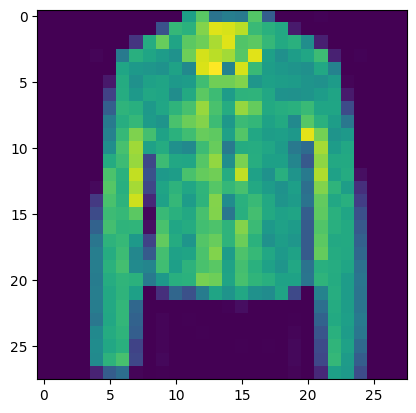

In [57]:
import matplotlib.pyplot as plt

# Assuming 'x' contains the image data
plt.imshow(x.cpu().squeeze())  # Move tensor to CPU if using GPU
plt.show()